In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/LAXMI NISHAD/OneDrive/Desktop/Data Science Project - CodSoft/IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

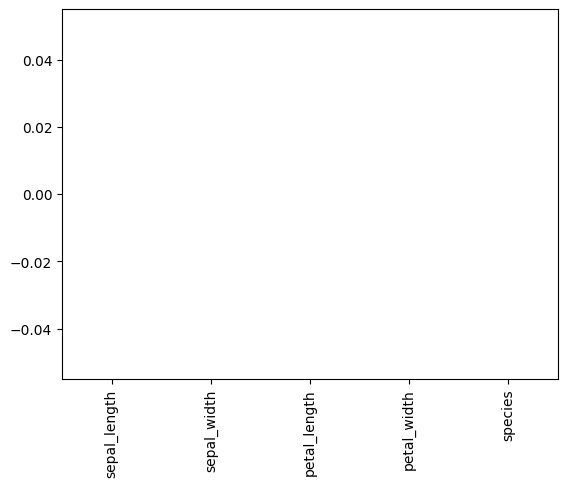

In [5]:
df.isna().sum().plot(kind='bar')

In [6]:
X=df.drop(labels='species',axis=1)
Y=df[['species']]

In [7]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()

In [14]:
model=lr.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Score: ',tr_acc)
print('Testing Score : ',ts_acc)

Training Score:  0.9666666666666667
Testing Score :  1.0


In [18]:
tr_rep=classification_report(ytrain,tr_pred)
ts_rep=classification_report(ytest,ts_pred)
print('Training Report : ',tr_rep)
print('Testing Report',ts_rep)

Training Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.93      0.95        41
 Iris-virginica       0.93      0.97      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Testing Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
tr_con=confusion_matrix(ytrain,tr_pred)
ts_con=confusion_matrix(ytest,ts_pred)
print('Training Matrix : ',tr_con)
print('Testing Matrix : ',ts_con)

Training Matrix :  [[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
Testing Matrix :  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
